In [73]:
import pandas as pd
import numpy as np

In [74]:
df=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv')

# you could also store this url string in a varible and then use 
# data='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'
# !wget $data    to download the data
# pd.read_csv('data.csv')


In [75]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [76]:
# Converting the columns of the dataset to lower case and replacing the space with underscore
df.columns=df.columns.str.lower().str.replace(' ','_')

In [77]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [78]:
#now we are going to do the same for the string type/ object type columns
df.dtypes # gives the the data types of each columns whose names appear as index
df.dtypes[df.dtypes=='object'] # filter the columns where the data type is object
# convert this object's indexes that actually have the column names to list so that we can iterate over that list that has columns that are string types
for col in list(df.dtypes[df.dtypes=='object'].index):
    df[col]=df[col].str.lower().str.replace(' ','_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


<b>2.3 Exploratory Data Analysis</b>



In [79]:
#Lets iterate over the columns and print some statistics

for col in df.columns:
    print(col)
    #print(df[col].head())   to look at the head values but it is more interesting to know the unique values
    print(df[col].unique()[:5])  # unique returns a numpy array of the unique values
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution of price


In [80]:
# to look at the distribution lets import some of the data visulization libraries

import matplotlib.pyplot as plt         # more low level one
import seaborn as sns                   # library on top of matplotlib to make charting easier

%matplotlib inline                      
# to look at the plots in notebook i.e so the plots can be displayed in the notebook


'""LONG TAIL DISTRIBUTION'

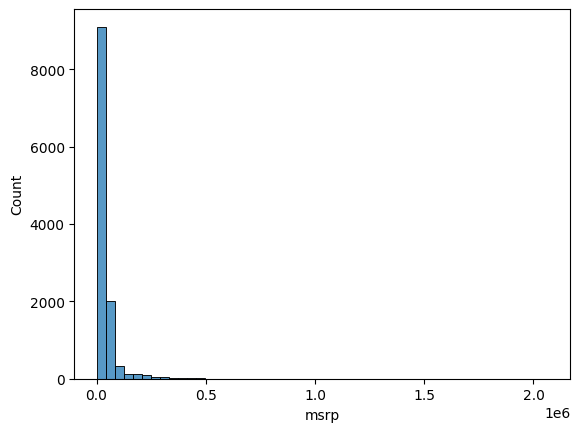

In [81]:
#first lets see the distribution of the prices i.e how many different prices are there.
sns.histplot(df.msrp,bins=50)          # bins is what breaks the data in the range instead of the smooth one so here there are 50 bins. the data in in 1*10^6 unit on the x axis

"""""""""""""""""LONG TAIL DISTRIBUTION"""""""""""""""""""""""""""""
#there are a lot of prices that are in the less price and there might be just one car that cost 1 million and just one car post 2 million and this type of distribution is called 

<Axes: xlabel='msrp', ylabel='Count'>

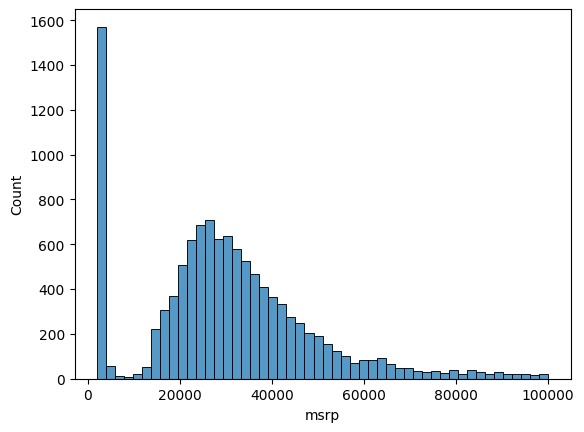

In [82]:
sns.histplot(df.msrp[df.msrp<100000],bins=50)

Apply logarithmic distribution

In [83]:
# for large values the value of the logarithm is not that large so. in case of normal distribution the result of our model is most optimal so we would like to convert the price column to logarithmic values
np.log([1,10,1000,100000])

array([ 0.        ,  2.30258509,  6.90775528, 11.51292546])

In [84]:
#log genrates error is that t gives error if the values are zero or negative. in our case the values start from 1000
np.log([0,10,1000,10000,-1])

/tmp/ipykernel_2282/3708235580.py:2: RuntimeWarning: divide by zero encountered in log
  np.log([0,10,1000,10000,-1])
/tmp/ipykernel_2282/3708235580.py:2: RuntimeWarning: invalid value encountered in log
  np.log([0,10,1000,10000,-1])


array([      -inf, 2.30258509, 6.90775528, 9.21034037,        nan])

In [85]:
#log generates error is that t gives error if the values are zero or negative. in our case the values start from 1000
#so we add 1 to each value to get rid of the error due to 0
np.log([0+1,10+1,1000+1,100000+1])

array([ 0.        ,  2.39789527,  6.90875478, 11.51293546])

In [86]:
# there is function in numpy that helps us to achieve this adding of the zero automatically
np.log1p([0,10,1000,100000])

array([ 0.        ,  2.39789527,  6.90875478, 11.51293546])

In [87]:
# so let convert our pricing to logarithmic
df.msrp=np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

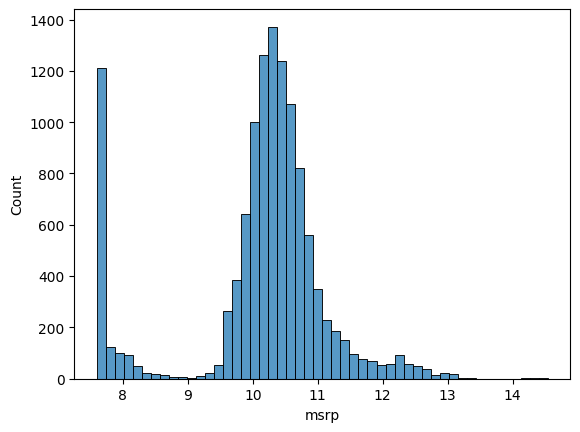

In [88]:
sns.histplot(df.msrp,bins=50)
#if the target variable look like this i.e the normal distribution models do pretty well in prediction

Missing values


In [89]:
df.isnull().sum() # df.isnull() will return the dataframe where each element will either be false or true depending upon whether ir is null or not

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

<b><font color='red'> 2.4 Setting up the validation framework</font></b>

In [90]:
# we split the dataset in 3 parts that is train valiation and test. lets assume 60,20,20 split in percentage
#lets calculate the size of our dataframe
len(df)

11914

In [91]:
#lets calculate the 20% of that.
print(len(df)*0.2) # this should come out not as a integer but is fraction but the partition has to be integer rows hence we use the int function to explicitly typecast the values
print(int(len(df)*0.2))


2382.8
2382


In [92]:
# lets create the variables that hold the values for number of rows for test train and validation data frame
n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=int(n*0.6)

In [93]:
#lets check whether the sum of the number of rows in three of these dataset will be equal to the total number of rows
n,n_test+n_train+n_val

(11914, 11912)

In [94]:
#since the number of records do not match hence we will take one part out and we take one part out and then for the third part we will subtract from the total number of rows to get the third frame
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test

In [95]:
# now we need to take out a parts of the dataframe as per the number of the rows that we have stored in the respective varibles
# for this we can use the iloc of pandas. it is an attribute of the dataframe, referenced by square brackets that get you fetch the record by position. Let's try to take the rows 1,2,3

df.iloc[[1,2,3]]


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,10.612779
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,10.500977
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,10.290483


In [96]:
df.iloc[[1,2,3],[0,1]]  # to get the three rows that is 1,2,3 and just the 0,1 column


,make,model
1,bmw,1_series
2,bmw,1_series
3,bmw,1_series


In [97]:
df.iloc[1,1] # gives the element at the intersection of 1st row and 1st column

'1_series'

In [98]:
df.iloc[:10] # gives the subset of the dataset containing the first 10 rows 0 to 9. 10 is exclusive

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,10.739349
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,10.612779
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,10.500977
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,10.290483
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,10.448744
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,10.348205
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,10.694238
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,10.579005
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,10.515994
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,10.524091


In [99]:
df.iloc[10:20]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,10.586610
11,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,10.357775
12,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,10.701017
13,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,19,3916,10.524091
14,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,10.357775
15,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,convertible,25,18,3916,10.784172
16,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,10.681688
17,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,7.601402
18,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,7.601402
19,audi,100,1992,regular_unleaded,172.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,20,16,3105,7.601402


In [100]:
df.iloc[11910:]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,10.945018
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,10.832122
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,10.838031
11913,lincoln,zephyr,2006,regular_unleaded,221.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,26,17,61,10.274913


 Shuffling the rows of the dataframe

In [101]:
# now before we split the dataset in 3 datasets using this iloc attribute and the variables that we created. the problem that can arise is that the data is not properly shuffled and the firt n_val rows that you take out from the dataset might just be of a single car brand
# Hence we will shuffle the dataframe
# now since we can use iloc to pick the rows at random just by passing random row location instead of first this many rows. hence we need to generate a random unordered sequence of numbers
# np.arange() to genrate a sequence and then we an shuffle it using np.random.shuffle
idx=np.arange(n)
np.random.seed(4018663137) #Setting the seed ensures that the random numbers generated by numpy are reproducible across different runs of your program allowing you to generate the same sequence of random numbers each time. In machine learning and data science, setting a seed helps in ensuring that the results (e.g., model training or testing) are consistent across multiple runs, which is useful for comparing model performance
np.random.shuffle(idx)
idx

array([ 1957,  3836,  4251, ...,  4294, 11808,  6936])

In [102]:
#now we can create the 3 sub datasets
df_train=df.iloc[idx[:n_train]]
df_val=df.iloc[idx[n_train:n_train+n_val]]
df_test=df.iloc[idx[n_train+n_val:]]

print(len(df_train))
print(len(df_val))
print(len(df_test))

7150
2382
2382


In [103]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1957,chevrolet,beretta,1994,regular_unleaded,120.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,31,22,1385,7.601402
3836,hyundai,elantra_coupe,2014,regular_unleaded,166.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,34,24,1439,9.883336
4251,volkswagen,eurovan,2001,premium_unleaded_(required),201.0,6.0,automatic,front_wheel_drive,3.0,NaN,large,passenger_minivan,18,15,873,10.229224
8030,buick,rainier,2005,regular_unleaded,275.0,6.0,automatic,all_wheel_drive,4.0,NaN,midsize,4dr_suv,19,14,155,10.480410
541,fiat,500e,2017,electric,NaN,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,103,121,819,10.367253


Reset the indices of each dataframe

In [104]:
df_train=df_train.reset_index(drop=True) #reset index gives a new dataframe having an index column that has the old indexed but we do not want that column hence the drop=true
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,beretta,1994,regular_unleaded,120.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,31,22,1385,7.601402
1,hyundai,elantra_coupe,2014,regular_unleaded,166.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,34,24,1439,9.883336
2,volkswagen,eurovan,2001,premium_unleaded_(required),201.0,6.0,automatic,front_wheel_drive,3.0,NaN,large,passenger_minivan,18,15,873,10.229224
3,buick,rainier,2005,regular_unleaded,275.0,6.0,automatic,all_wheel_drive,4.0,NaN,midsize,4dr_suv,19,14,155,10.480410
4,fiat,500e,2017,electric,NaN,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,103,121,819,10.367253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,audi,q5,2016,premium_unleaded_(required),220.0,4.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,28,20,3105,10.618910
7146,chevrolet,avalanche,2011,flex-fuel_(unleaded/e85),320.0,8.0,automatic,four_wheel_drive,4.0,"crossover,flex_fuel",large,crew_cab_pickup,21,15,1385,10.809748
7147,oldsmobile,eighty-eight,1998,regular_unleaded,205.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,27,17,26,7.649216
7148,acura,rdx,2016,premium_unleaded_(recommended),279.0,6.0,automatic,front_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,29,20,204,10.573136


Get the Target varible(y)

In [105]:
df_train.msrp

# we need to convert it into a numpy array hence we can use values
y_train=df_train.msrp.values
y_val=df_val.msrp.values
y_test=df_test.msrp.values


Removing the msrp column from out dataset that is the target varible

In [106]:
# we do not want to use the target varible while training the data since if that is done then ofcourse our model will be perfect
# del df_val.msrp this . syntax can not be used here while deleting a column from the dataframe
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# df_val = df_val.drop(columns=['msrp'])  # Drop the column by name. this is another way to delete a column. You must specify columns=['msrp'] to delete a column. If you omit columns=, drop() will attempt to drop rows, which could result in an error.

<b><font color='red'> 2.5 Linear Regression</font></b>

In [107]:
np.random.get_state()[1][0]# to get the current seed value,since I forgot to add the seed line earlier :)


np.uint32(3103575814)

In [108]:
df_train.iloc[10] # lets take a look at the 10th row for a simplified version of the datset

make                                       dodge
model                                      viper
year                                        2016
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  645.0
engine_cylinders                            10.0
transmission_type                         manual
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category          exotic,high-performance
vehicle_size                             compact
vehicle_style                              coupe
highway_mpg                                   21
city_mpg                                      12
popularity                                  1851
Name: 10, dtype: object

In [109]:
#lets take only engine_hp, city_mpg and popularity as the features
xi=[453,11,86]

In [110]:

# this is the liner regression in simple form, we have the weight associated with each feature and then we do this. this has been implemented for only a single row for the moment

def linear_regression(xi):
    w=[0.01,0.04,0.002]   # weight matrix
    pred=7.17  #w0   bias term that is, if we do not know any thing about a car then what will be the price of the car
    for j in range(len(xi)):
        pred=pred+w[j]*xi[j]
        
    return pred

In [111]:
linear_regression(xi)

12.312

In [112]:
# since we did the logarithm at the start so now we need to do the exp and then we also need to subtract -1
np.exp(linear_regression(xi))-1

np.float64(222347.2221101062)

In [113]:
# instead of doing this -1 we can directly use the following function

np.expm1(linear_regression(xi))

np.float64(222347.2221101062)

<b><font color='red'> Linear regression vector form</font></b>

In [114]:
# if we see carefully the feature and weight product is nothing but the dot product directly tha is offered by np
# regarding the W0 that is the bias term we can think of it as an extra feature whose value is 1 so the weight term come up directly

w=[0.01,0.04,0.002]
w_vect=[7.17]+w         # this is the weight vector including w0

def linear_regression(xi):
    xi= [1]+xi
    return np.dot(xi,w_vect)

linear_regression(xi)

np.float64(12.312)

In [115]:
# lets say we have more rows or vector
x1=[1,148,24,1385]
x2=[1,132,24,1385]
x10=[1,453,11,86]

x=[x1,x2,x10]
x=np.array(x)
x

array([[   1,  148,   24, 1385],
       [   1,  132,   24, 1385],
       [   1,  453,   11,   86]])

In [116]:
x.dot(w_vect)

array([12.38 , 12.22 , 12.312])

In [117]:
def linear_regression(X):
    return x.dot(w_vect)

linear_regression(x)

array([12.38 , 12.22 , 12.312])

<b><font color='red'> Training a linear regression model </font></b>

In [118]:
# we have to solve for the weights hence we will use the gram matrix as in x.xT will give me a square matrix called gram matrix where x is out feature matrix so inv(x.xT).xT.x .w= inv(x.xT).xT.y, where y is the feature matrix and hence in the left side we get weights and on the right side we get the values of those weights
# for derivation you can refer to the book called element of statistical learning.
# lets define the x the feature matrix

feature_matrix=np.array([[   1,  148,   24, 1385],
        [   1,  132,   24, 1385],
        [   1,  453,   11,   86],
        [   1,  460,   12,   2000],
        [   1,  500,   11,   500],
        [   1,  600,   13,   200],
        [   1,  500,   15,   100],
        [   1,  800,   22,   1300],
        [   1, 400,   24,   100]]  )   #this is a list of list 1 has been added to get the bias weight

predict_matrix=[10000,12000,10000,20000,13500,10000,14300,17200,13245]


In [119]:
Weight_vector_new=np.linalg.inv(feature_matrix.T.dot(feature_matrix)).dot(feature_matrix.T).dot(predict_matrix)

Weight_vector_new

array([ 7.47796309e+03,  9.15794132e+00, -4.10442657e+01,  3.22825651e+00])

In [120]:
#   here we have entered and extra feature to calculate the bias term and have kept the value of each term a 1.as_integer_ratio
#   We can generate this sequence of ones and then we can append it to the actual feature matrix to get the dummy feature column for making the feature matrix. for demonstration lets assume we have to add 1 ones again

ones=np.ones(feature_matrix.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [121]:
# now there is a function in numpy called column_stack in which we can take column and can stack them together

np.column_stack([ones,ones])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [122]:
np.column_stack([ones,feature_matrix]) # the result of this is a two dimensional matrix
#    once the ones are added as the dummy feature then you can use this new feature matrix for calculating the linear regression weights


array([[1.000e+00, 1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.000e+00, 1.320e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.000e+00, 4.600e+02, 1.200e+01, 2.000e+03],
       [1.000e+00, 1.000e+00, 5.000e+02, 1.100e+01, 5.000e+02],
       [1.000e+00, 1.000e+00, 6.000e+02, 1.300e+01, 2.000e+02],
       [1.000e+00, 1.000e+00, 5.000e+02, 1.500e+01, 1.000e+02],
       [1.000e+00, 1.000e+00, 8.000e+02, 2.200e+01, 1.300e+03],
       [1.000e+00, 1.000e+00, 4.000e+02, 2.400e+01, 1.000e+02]])

In [123]:
# now lets put it in the fuction

def train_linear_regression(X,Y):
    Ones=np.ones(X.shape[0])
    X=np.column_stack([Ones,X])
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    

<b><font color='red'> Car price baseline model</font></b>

In [124]:
# now lets do train the model for our car's dataset
#lets take a look at the columns and decide which can be our fetures

df_train.columns


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [125]:
baseline_columns=['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

df_train[baseline_columns]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,120.0,4.0,31,22,1385
1,166.0,4.0,34,24,1439
2,201.0,6.0,18,15,873
3,275.0,6.0,19,14,155
4,NaN,0.0,103,121,819
...,...,...,...,...,...
7145,220.0,4.0,28,20,3105
7146,320.0,8.0,21,15,1385
7147,205.0,6.0,27,17,26
7148,279.0,6.0,29,20,204


In [126]:
# we can use the values attributes to get the vector numpy arrays
X_train=df_train[baseline_columns].values
X_train
y_train

array([ 7.60140233,  9.88333586, 10.22922379, ...,  7.64921632,
       10.57313578, 10.35363918])

In [127]:
# Now lets call the linear regression model

train_linear_regression(X_train,y_train)

array([nan, nan, nan, nan, nan, nan])

In [128]:
# this has come as nan since we have missing values hence lets check and remove those
df_train[baseline_columns].isna().sum()

engine_hp           40
engine_cylinders    18
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [129]:
# now the easiest is that we can replace the nan values with zero hence the model ignore that feature where the value is zero for that row
X_train=df_train[baseline_columns].fillna(0).values

In [130]:
weights=train_linear_regression(X_train,y_train)

In [131]:
w0=weights[0]
w=weights[1:]

In [132]:
# predicted target varibale values

y_pred=w0+X_train.dot(w)

<Axes: ylabel='Count'>

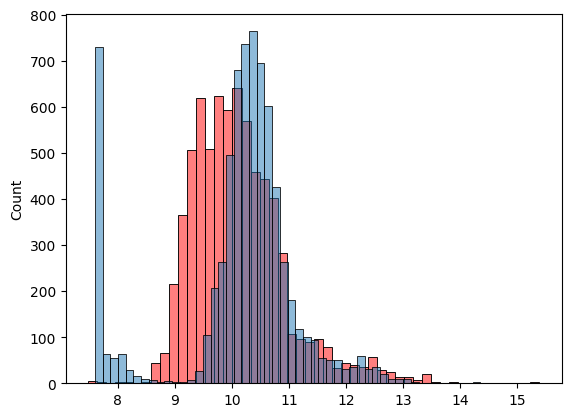

In [133]:
sns.histplot(y_pred,color='red',bins=50,alpha=0.5) # alpha is used to control the transparency of the plots
sns.histplot(y_train,bins=50,alpha=0.5)


<b><font color='red'> RMSE</font></b>

In [134]:
# defining the root mean squared error function

def RMSE(Y,Y_pred):
    return np.sqrt(((Y-Y_pred)**2).mean())

In [135]:
RMSE(y_train,y_pred)

np.float64(0.7441467877918642)

<b><font color = 'red'> Computing RMSE on validation data / Validating the model</font></b>

In [136]:
# Now we will compute the root mean squared error for Validation data set 

X_val=df_val[baseline_columns].fillna(0).values

Y_val=w0+X_val.dot(w)

RMSE(Y_val,y_val)

np.float64(0.7733038666747758)

In [137]:
# now we will work on improving the model next


<b><font color='red'>Simple feature engineering</font></b>

In [138]:
# the performance of the model is not that great so we will look at the features that we can include that can help in improving the efficiency of the model
# Lets include the year column but not directly, first lets check the max available year and from that check th age

df.year.max()-df.year # this is the age of the car

0         6
1         6
2         6
3         6
4         6
         ..
11909     5
11910     5
11911     5
11912     4
11913    11
Name: year, Length: 11914, dtype: int64

In [143]:
# Lets change the feature matrix
X_train=df_train[['year']+baseline_columns]

X_train.year=X_train.year.max()-X_train.year
X_train=X_train.fillna(0).values


/tmp/ipykernel_2282/1206915436.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.year=X_train.year.max()-X_train.year


In [146]:
# Now lets calculate the weights using linear regression
w_new=train_linear_regression(X_train,y_train)
w0=w_new[0]
w=w_new[1:]

In [147]:
y_predict=w0+X_train.dot(w)

In [148]:
RMSE(y_predict,y_train)

np.float64(0.5108747653945535)

In [152]:
# Similarly doing the same for validation dataset
X_val=df_val[['year']+baseline_columns]
X_val.year=X_val.year.max()-X_val.year
X_val=X_val.fillna(0).values

y_pred=w0+X_val.dot(w)

RMSE(y_pred,y_val)

/tmp/ipykernel_2282/1537687081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val.year=X_val.year.max()-X_val.year


np.float64(0.5270929997357291)

<Axes: ylabel='Count'>

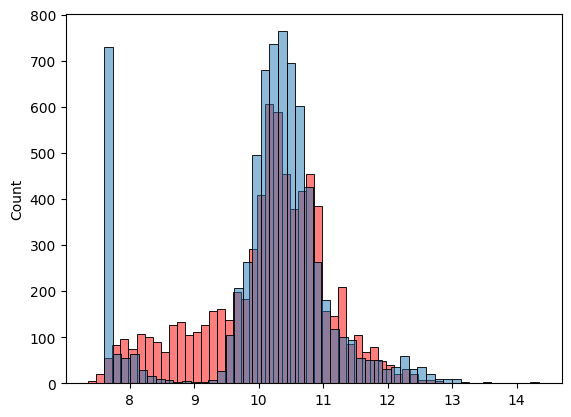

In [156]:

sns.histplot(y_predict,bins=50,alpha=0.5,color='red')
sns.histplot(y_train,bins=50,alpha=0.5)

<b><font color='red'> Categorical Variable</font></b>